[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/096_ml_unsupervised/096_ml_unsupervised.ipynb)

# ML - Aprendizaje No Supervisado

Si bien todos los ejemplos de *Machine Learning* que hemos visto hasta ahora en esta serie se han basado en aprendizaje supervisado (nuestros datos van acompañados de las etiquetas correspondientes, ejemplos de la tarea que queremos llevar a cabo) la mayoría de los datos no están etiquetados. Antes esta problemática tenemos dos alternativas: etiquetar datos manualmente (lo cual require de tiempo, esfuerzo y dinero en el caso de querer desarrollar sistemas reales) o bien usar técnicas de aprendizaje no supervisado, o *Unsupervised Learning* en inglés.

## Clustering

De entre las diferentes técnicas de aprendizaje no supervisado, el *Clustering* es una de las más usadas. Este técnica consiste en identificar aquellas muestras similares del conjunto de datos y asignarlas a un *cluster*, o grupo. Esto permite aplicaciones tales como: segmentación de clientes, análisis de datos, reducción de la dimensionalidad, detección de anomalías, aprendizaje semi-supervisado, motores de búsqueda e incluso la semgentación de imágenes.

# Centroides

Un centroide es el punto central o promedio de un conjunto de datos dentro de un cluster. En el contexto del algoritmo K-Means, un centroide es el punto que representa el "centro" de un cluster después de agrupar los datos.

### K-Means

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

Este código genera un conjunto de datos con un número aleatorio de centroides entre 1 y 10, asegurando una distancia mínima entre ellos para facilitar la verificación visual.

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Generar un número aleatorio de centroides entre 1 y 10
num_centroides = np.random.randint(1, 11) # Selecciona aleatoriamente cuántos clusters o grupos de datos habrá (entre 1 y 10)

# Paso 2: Generar posiciones de los centroides aleatoriamente, asegurando separación significativa
centroides = np.random.uniform(low=-10, high=10, size=(num_centroides, 2))
# Genera las posiciones de los centroides dentro del rango [-10, 10] en ambas dimensiones (x, y)

# Paso 3: Definir desviaciones estándar para los blobs (clusters)
blob_std = np.random.uniform(0.5, 1.5, size=num_centroides)
# Define la dispersión (desviación estándar) de los puntos alrededor de cada centroide para cada cluster

# Generar dataset con clusters
X, y = make_blobs(n_samples=2000, centers=centroides, cluster_std=blob_std)
# Crea 2000 puntos de datos distribuidos alrededor de los centroides generados, usando las desviaciones estándar definidas

In [ ]:
# Función para graficar los clusters
def plot_clusters(X, y=None):

   # Crea una función para graficar los puntos, usando opcionalmente las etiquetas 'y' para colorear los clusters
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
     # Grafica los puntos X en un gráfico de dispersión (scatter plot). X[:, 0] son los valores del eje x, X[:, 1] son los valores del eje y.
    # 'c=y' usa las etiquetas de cluster para colorear los puntos. 's=1' define el tamaño pequeño de los puntos.

    plt.xlabel("$x_1$", fontsize=14) # Etiqueta para el eje x, con tamaño de fuente 14
    plt.ylabel("$x_2$", fontsize=14, rotation=0) # Etiqueta para el eje y, con tamaño de fuente 14 y sin rotación

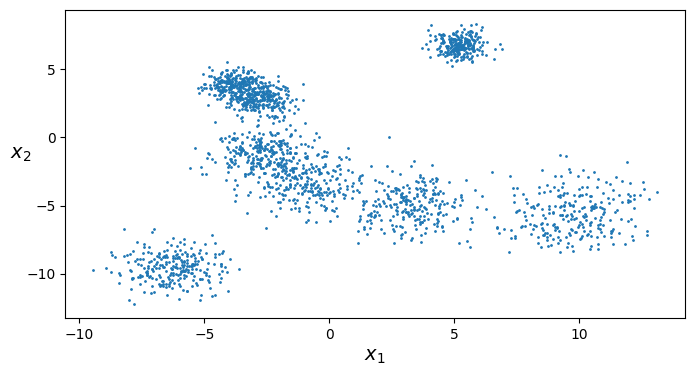

In [ ]:
 # Etiqueta para el eje y, con tamaño de fuente 14 y sin rotación
plt.figure(figsize=(8, 4)) # Crea una figura de 8x4 pulgadas para el gráfico

# Graficar los clusters
plot_clusters(X)# Llama a la función 'plot_clusters' para graficar los puntos generados

# Mostrar el gráfico
plt.show()# Muestra el gráfico en pantalla

En *Scikit-Learn* puedes usar el objeto [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), indicando el número de clusters deseado.  

Su objetivo es agrupar los datos en clusters o grupos de acuerdo con la proximidad de los puntos.

In [ ]:
from sklearn.cluster import KMeans

# Paso 4: Aplicar K-Means con un número de clusters k
k = num_centroides  # Aquí usamos el número de clusters igual al número de centroides generados anteriormente
kmeans = KMeans(n_clusters=k, random_state=42) # Inicializamos el algoritmo de K-Means con k clusters
y_pred = kmeans.fit_predict(X)# Aplicamos el algoritmo a los datos X y obtenemos las etiquetas de los clusters predichos para cada punto
# K-Means se entrena con los datos de entrada X, ajustando los k clusters
# Predice a qué cluster pertenece cada punto de los datos X, y devuelve un array con las etiquetas predichas (y_pred)

In [ ]:
num_centroides

8

Este atributo del modelo **kmeans.cluster_centers_** devuelve las coordenadas de los centroides finales después de que el algoritmo ha terminado su proceso de clustering

In [ ]:
# Obtener las posiciones de los centroides generados por K-Means
kmeans.cluster_centers_

array([[-0.85114252, -3.47224696],
       [-3.27082872,  3.33593474],
       [ 9.78490053, -5.58960578],
       [-6.26261299, -9.54205878],
       [ 5.21002104,  6.79601344],
       [ 2.81463007, -5.99872512],
       [-2.69214695, -1.13056485],
       [ 3.77680562, -4.13636183]])

In [ ]:
# Definir nuevos puntos a predecir
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])# Nuevos puntos para los que queremos predecir a qué cluster pertenecen
kmeans.predict(X_new) # Predice a qué cluster pertenecen los nuevos puntos


array([1, 4, 1, 1], dtype=int32)

In [ ]:
# Función para graficar los datos
def plot_data(X):
# Grafica los puntos de datos originales en negro ('.k') con un tamaño de marcador pequeño (2)
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

# Función para graficar los centroides
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
  # Esta función grafica los centroides. Puede resaltar los centroides con mayor peso si se proporcionan los pesos.
    if weights is not None: #esta línea filtra aquellos centroides con pesos mayores a un umbral (en este caso, los que son al menos 1/10 del peso máximo)
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9) # Dibuja círculos alrededor de los centroides
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)# Dibuja cruces en las posiciones de los centroides

# Función para graficar las fronteras de decisión
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
  # Esta función grafica las fronteras de decisión, es decir, las líneas que dividen los espacios entre los clusters.
    mins = X.min(axis=0) - 0.1# Define el límite inferior de los ejes, con un pequeño margen
    maxs = X.max(axis=0) + 0.1# Define el límite superior de los ejes, con un pequeño margen
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))# Crea una malla (grid) para evaluar las predicciones en todo el espacio de datos
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])# Predice el cluster para cada punto de la malla
    Z = Z.reshape(xx.shape)# Da forma a los resultados para ajustarlos a la malla

  # Graficar las fronteras de los clusters usando colores diferentes
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")# Rellena las áreas entre las fronteras con colores suaves
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')# Dibuja las líneas de las fronteras
    plot_data(X)  # Llama a la función para graficar los puntos de datos originales
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)# Llama a la función para graficar los centroides

 # Opcionalmente, muestra o esconde las etiquetas de los ejes
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14) # Etiqueta para el eje X
    else:
        plt.tick_params(labelbottom=False)# Oculta las etiquetas del eje X si se indica
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0) # Etiqueta para el eje Y
    else:
        plt.tick_params(labelleft=False) # Oculta las etiquetas del eje Y si se indica



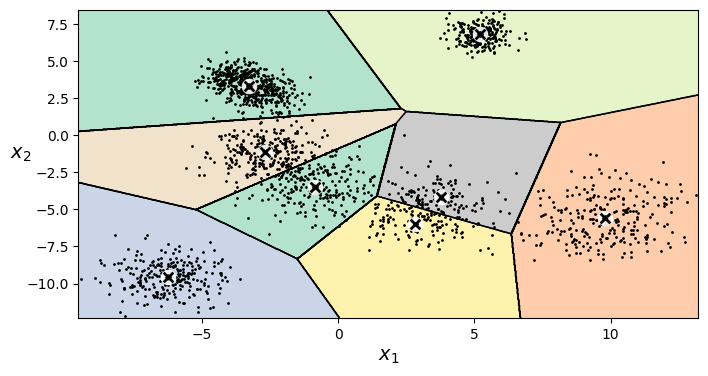

In [ ]:
# Graficar las fronteras de decisión
plt.figure(figsize=(8, 4))  # Crea una figura de tamaño 8x4 para el gráfico
plot_decision_boundaries(kmeans, X)# Llama a la función para graficar las fronteras de decisión y los puntos de datos
plt.show() # Muestra el gráfico

En lugar de asignar un grupo a cada muestra (*hard clustering*) se le puede asignar una puntuación (*soft clustering*) en función de su distancia al centroide.

In [ ]:
# Usamos la transformación de K-Means en los nuevos puntos para obtener la distancia de cada punto a los centroides
kmeans.transform(X_new)

array([[ 5.53804391,  3.53313488, 12.38331112, 13.13161994,  7.08138858,
         8.47948973,  4.12893346,  7.20549771],
       [ 6.69154582,  6.4115532 , 10.18022549, 14.79915945,  5.28071377,
         8.0008728 ,  6.49622761,  6.18533455],
       [ 6.81964582,  0.43150937, 15.40243517, 12.95947075,  9.04511822,
        10.71386843,  4.14202119,  9.84137971],
       [ 6.34707194,  0.87871217, 15.12928958, 12.47621029,  9.26607668,
        10.29748763,  3.64359365,  9.48506156]])

Este algoritmo funciona asignando centroides de manera aleatoria y, de manera iterativa, asigna cada instancia a uno de ellos (el más cercano) tras lo cual se recalcula el centroide como el valor promedio de todas las instancias asignadas al grupo.

In [ ]:
# Usamos el número aleatorio de centroides generados previamente
k = num_centroides# El número de clusters es el mismo que el número de centroides generados aleatoriamente antes

# Configuración del modelo K-Means con inicialización inteligente
kmeans_iter1 = KMeans(n_clusters=k, init="k-means++", n_init=1, algorithm="elkan", max_iter=3, random_state=1)
# Crea un modelo K-Means usando "k-means++" para inicializar los centroides de forma más eficiente y rápida.
# El algoritmo "elkan" se utiliza para mejorar la velocidad y la eficiencia de K-Means.
# `max_iter=3` limita el número de iteraciones a 3 en este caso.

kmeans_iter2 = KMeans(n_clusters=k, init="k-means++", n_init=1, algorithm="elkan", max_iter=2, random_state=1)
# Crea otro modelo con 2 iteraciones como máximo para comparar las iteraciones

kmeans_iter3 = KMeans(n_clusters=k, init="k-means++", n_init=1, algorithm="elkan", max_iter=3, random_state=1)
# Otro modelo con 3 iteraciones, similar a 'kmeans_iter1'


# Ajustar el modelo en cada iteración
kmeans_iter1.fit(X)  # Entrena el modelo en el dataset con 3 iteraciones
kmeans_iter2.fit(X)  # Entrena el segundo modelo en el dataset con 2 iteraciones
kmeans_iter3.fit(X)  # Entrena el tercer modelo en el dataset con 3 iteraciones


KMeans(algorithm='elkan', max_iter=3, n_init=1, random_state=1)

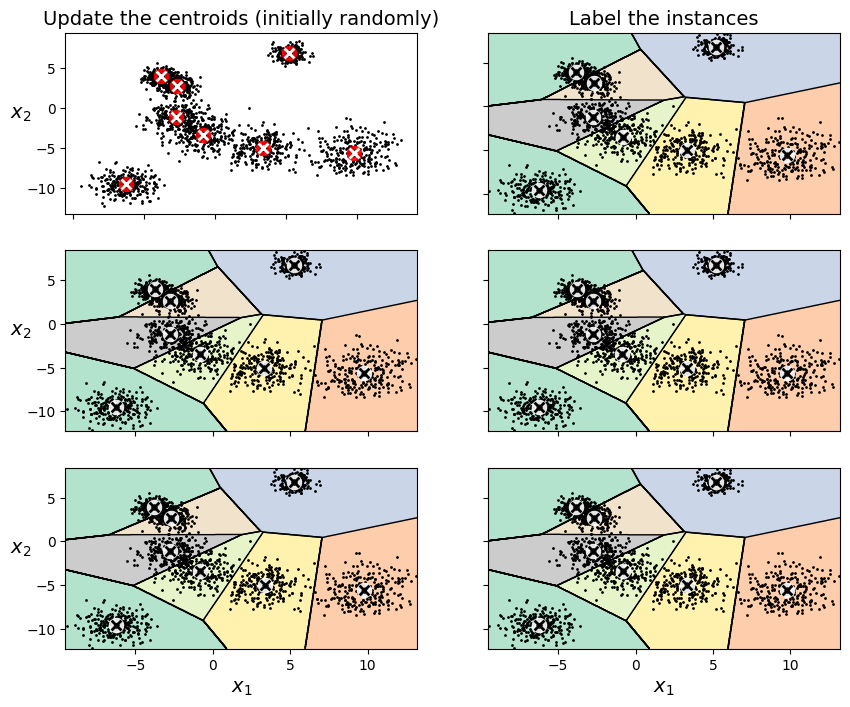

In [ ]:
# Graficar las iteraciones del modelo
plt.figure(figsize=(10, 8)) # Configura el tamaño de la figura para las subplots

# Iteración 1
plt.subplot(321) # Crea un subgráfico en la posición 1
plot_data(X) # Grafica los puntos de datos
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')# Grafica los centroides de la primera iteración
plt.ylabel("$x_2$", fontsize=14, rotation=0) # Etiqueta el eje y
plt.tick_params(labelbottom=False) # No mostrar etiquetas en el eje X
plt.title("Update the centroids (initially randomly)", fontsize=14) # Título de la gráfica de la primera iteración

plt.subplot(322)# Crea un subgráfico en la posición 2
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)# Grafica las fronteras de decisión para la primera iteración
plt.title("Label the instances", fontsize=14)  # Grafica los centroides de la segunda iteración

# Iteración 2
plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324) # Crea un subgráfico en la posición 4
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)# Grafica las fronteras de decisión para la segunda iteración

# Iteración 3
plt.subplot(325) # Crea un subgráfico en la posición 5
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False) # Grafica las fronteras sin centroides para la segunda iteración
plot_centroids(kmeans_iter3.cluster_centers_)  # Grafica los centroides de la tercera iteración

plt.subplot(326) # Crea un subgráfico en la posición 6
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False) # Grafica las fronteras de decisión para la tercera iteración

# Mostrar las gráficas
plt.show()

Esto implica que en función del estado inicial, el algoritmo puede llegar a una solución u otra.

In [ ]:
# Usamos el número aleatorio de centroides generados previamente
k = num_centroides

# Definir dos modelos K-Means con diferentes random_state
kmeans_rnd_init1 = KMeans(n_clusters=k, init="random", n_init=1, algorithm="elkan", random_state=11)
# Modelo K-Means 1 con inicialización aleatoria de centroides, un solo inicio (n_init=1) y el algoritmo 'elkan'.
# El random_state se establece en 11 para reproducibilidad.

kmeans_rnd_init2 = KMeans(n_clusters=k, init="random", n_init=1, algorithm="elkan", random_state=19)
# Modelo K-Means 2, también con inicialización aleatoria, pero con un random_state diferente (19).
# Esto permite comparar cómo cambia el agrupamiento con diferentes valores iniciales aleatorios.

# Función para comparar dos modelos de clustering
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    # Entrenar ambos modelos en el conjunto de datos X
    clusterer1.fit(X)
    clusterer2.fit(X)

# Configurar el tamaño del gráfico para mostrar los resultados comparativos
    plt.figure(figsize=(10, 3.2))
 # Subplot para el primer modelo
    plt.subplot(121)# Divide el gráfico en dos (1 fila, 2 columnas), posición 1
    plot_decision_boundaries(clusterer1, X) # Dibuja las fronteras de decisión del primer modelo
    if title1:
        plt.title(title1, fontsize=14)# Añade el título a la gráfica del primer modelo
# Subplot para el segundo modelo
    plt.subplot(122) # Posición 2 del gráfico dividido en dos
    plot_decision_boundaries(clusterer2, X, show_ylabels=False) # Dibuja las fronteras de decisión del segundo modelo
    if title2:
        plt.title(title2, fontsize=14) # Añade el título a la gráfica del segundo modelo

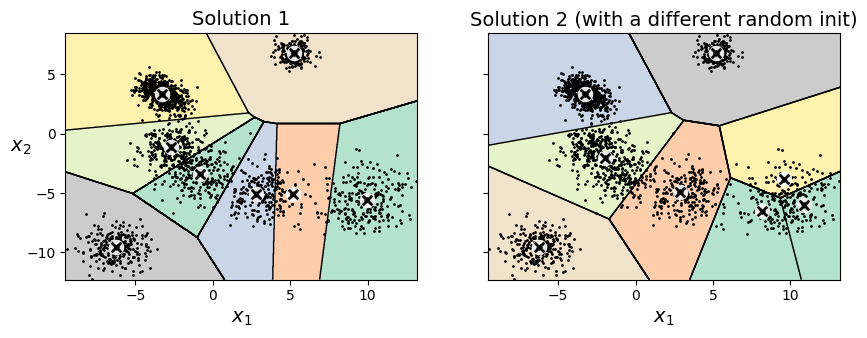

In [ ]:
# Comparar las soluciones de ambos modelos
plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X, "Solution 1", "Solution 2 (with a different random init)")
# Llama a la función de comparación para mostrar las soluciones de ambos modelos con títulos correspondientes

plt.show()# Muestra el gráfico con las dos comparaciones de modelos

Para minimizar el impacto de la inicialización tenemos varias alternativas: probar varias y quedarnos con la mejor, o usar la inicialización inteligente que ofrece *Scikit-Learn* por defecto.

In [ ]:
# K-Means con 10 inicializaciones aleatorias
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="elkan", random_state=11)
# Definir un modelo K-Means con 5 clusters, inicialización aleatoria de centroides y 10 inicializaciones (n_init=10).
# Se usa el algoritmo 'elkan' y el random_state=11 para consistencia.

# Entrenar el modelo K-Means
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=5, n_init=10,
       random_state=11)

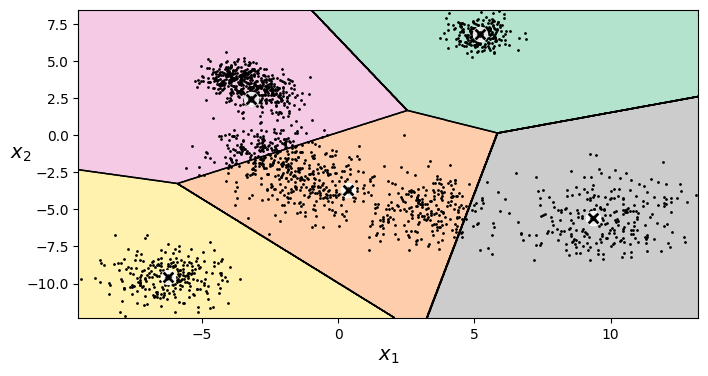

In [ ]:
# Graficar las fronteras de decisión del modelo con 10 inicializaciones
plt.figure(figsize=(8, 4)) # Configurar el tamaño del gráfico
plot_decision_boundaries(kmeans_rnd_10_inits, X) # Dibuja las fronteras de decisión para el modelo
plt.show() # Muestra la gráfica

Otras mejoras al algoritmo de *K-Means* incluyen: *K-Means* acelerados (usado por *Scikit-Learn* por defecto y que evita algunos cálculos de distancias) y *mini-batch K-Means* (que puedes usarse si el dataset es tan grande que no cabe en memoria). Vamos a ver un ejemplo de este último caso con el dataset MNIST, para lo cual usaremos el objeto [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html?highlight=minibatchkmeans#sklearn.cluster.MiniBatchKMeans).

In [ ]:
# Importar el dataset MNIST desde OpenML
from sklearn.datasets import fetch_openml
# Cargar el conjunto de datos MNIST, que contiene imágenes de dígitos escritos a mano
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)# Convertir las etiquetas a enteros para su procesamiento


In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)
# Separamos los datos en conjunto de entrenamiento (X_train, y_train) y prueba (X_test, y_test) con una semilla aleatoria fija


In [ ]:
# Función para cargar un lote aleatorio de datos
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]
    # Esta función selecciona un subconjunto aleatorio de tamaño batch_size de la matriz de datos X para simular un procesamiento por lotes

In [ ]:
# Importar el modelo MiniBatchKMeans para clustering
from sklearn.cluster import MiniBatchKMeans

# Configuración del algoritmo K-Means
k = 5 # Número de clusters
n_init = 10 # Número de inicializaciones para elegir la mejor
n_iterations = 100 # Número de iteraciones para el algoritmo MiniBatchKMeans
batch_size = 100 # Tamaño de cada batch de datos
init_size = 500 # Tamaño inicial de los datos para la inicialización
evaluate_on_last_n_iters = 10 # Evaluar en las últimas 10 iteraciones para determinar el mejor modelo

best_kmeans = None # Variable para almacenar el mejor modelo K-Means

# Ciclo para inicializar y ajustar K-Means varias veces
for init in range(n_init):
   # Inicializar MiniBatchKMeans con el tamaño de inicio configurado
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
     # Cargar el primer batch para inicializar el modelo
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)  # Ajustar el modelo con el batch inicial

# Inicializar la suma de inercia (criterio para medir la calidad del clustering)
    minibatch_kmeans.sum_inertia_ = 0

    # Ciclo para ejecutar iteraciones del algoritmo MiniBatchKMeans
    for iteration in range(n_iterations):
       # Cargar el siguiente batch de datos
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)# Ajustar el modelo con el nuevo batch

 # En las últimas iteraciones, acumular la inercia para evaluar la calidad
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    # Actualizar el mejor modelo si tiene una inercia más baja (mejor ajuste)
    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [ ]:
# Evaluar el modelo MiniBatchKMeans final ajustado
best_kmeans.score(X)

-9716.92810292219

El algoritmo de *mini-batch K-Means* es más rápido que *K-Means* normal, pero su precisión suele ser peor.

### Encontrando el número óptimo de grupos

Como hemos visto anteriormente, el número de grupos o *clusters* es un hyperparámetro del modelo que debemos definir, y como podrás imaginar si nuestros datos no están etiquetados no será imposible saber qué valor usar. Para ello la solución se basa en usar diferentes valores y utilizar alguna métrica significativa. Una de estas métricas se conoce como el *silhouette score*, que se basa en calcular el coeficiente de silueta (*silhouette coefficient*) de todas las muestras del dataset como $(b-a)/\mathrm{max}(a,b)$ donde $a$ es la distancia mínima al resto de muestras del mismo grupo y $b$ es la distancia media de los grupos más cercanos. Su valor se encuentra entre $1$ y $-1$. Un valor cercano a $1$ indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a $0$ indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a $-1$ indica que la muestra está en el grupo incorrecto.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.5970454419528582

Calculando la métrica para diferentes números de *clusters* podemos encontrar el valor óptimo.

In [ ]:
k

5

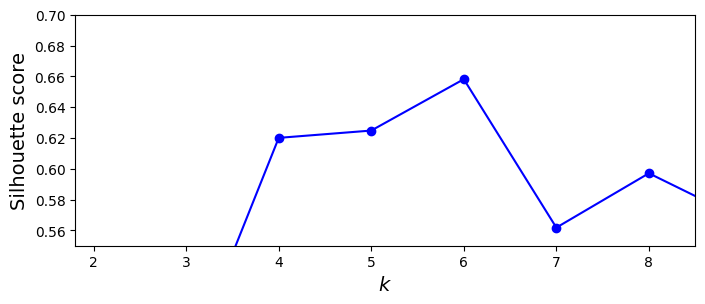

In [ ]:
# Definir un rango de valores de k (número de clusters) para evaluar
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
    # Entrenar un modelo K-Means para cada valor de k en el rango de 1 a 9 clusters

# Calcular la métrica del coeficiente de silueta para cada valor de k
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
# El coeficiente de silueta mide cuán compactos y separados están los clusters para cada valor de k (excepto k=1)

# Graficar los coeficientes de silueta en función del número de clusters
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")# Crear gráfico de línea para los valores de k desde 2 hasta 9
plt.xlabel("$k$", fontsize=14)# Etiqueta en el eje x
plt.ylabel("Silhouette score", fontsize=14) # Etiqueta en el eje y
plt.axis([1.8, 8.5, 0.55, 0.7])  # Definir los límites de los ejes
plt.show()  # Mostrar el gráfico

También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.

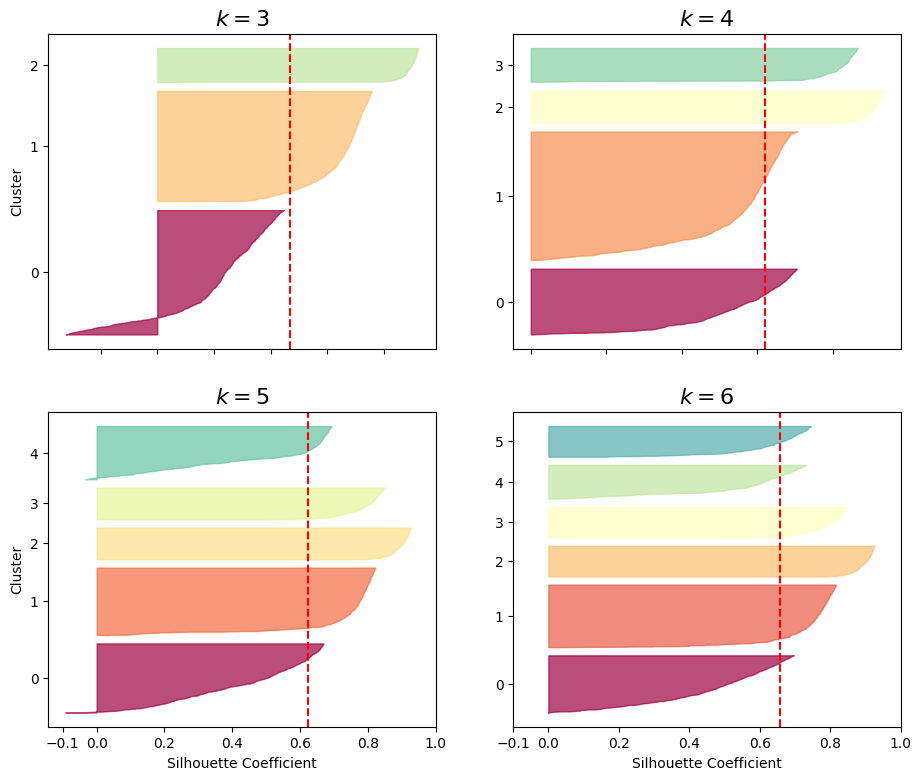

In [ ]:
from sklearn.metrics import silhouette_samples # Importar la función para obtener los coeficientes de silueta de cada punto
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9)) # Definir el tamaño de la figura para los subplots

# Loop para crear subplots para cada valor de k
for k in (3, 4, 5, 6):  # Analiza k=3, k=4, k=5, y k=6
    plt.subplot(2, 2, k - 2) # Crear una cuadrícula 2x2 de gráficos (k-2 ajusta los índices de subplot)

  # Obtener las etiquetas de los clusters predichos por el modelo KMeans para el valor de k actual
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred) # Calcular los coeficientes de silueta para cada punto

  # Espaciado entre clusters en el gráfico
    padding = len(X) // 30
    pos = padding
    ticks = []

     # Para cada cluster, calcular y ordenar los coeficientes de silueta
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i] # Coeficientes de las muestras del cluster i
        coeffs.sort()# Ordenar los coeficientes de silueta para ese cluster

        # Asignar color al cluster utilizando el mapa de colores 'Spectral'
        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)# Dibujar la región del cluster
        ticks.append(pos + len(coeffs) // 2)# Guardar la posición del cluster para etiquetarlo en el eje y
        pos += len(coeffs) + padding # Actualizar la posición para el siguiente cluster

# Personalizar el eje y para mostrar las etiquetas del cluster
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster") # Etiqueta en el eje y para k=3 y k=5

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) # Configurar los ticks en el eje x para k=5 y k=6
        plt.xlabel("Silhouette Coefficient") # Etiqueta en el eje x para k=5 y k=6
    else:
        plt.tick_params(labelbottom=False)  # No mostrar etiquetas en el eje x para k=3 y k=4
  # Dibujar una línea roja discontinua en la media del coeficiente de silueta para ese valor de k
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)# Título del gráfico indicando el valor de k

plt.show()  # Mostrar el gráfico

# Punto 2

# Aprendizaje Semi-Supervisado con K-Means

### K-Means para aprendizaje semi-supervisado.

El aprendizaje semi-supervisado (o *Semi-supervised Learning*) comprende el conjunto de técnicas que nos permiten entrenar modelos con datasets parcialmente etiquetados. En esta sección vamos a ver un ejemplo de como podemos aplicar esta técnica con el dataset MNIST y usando *K-Means*. Empezamos descargando el dataset.

###Paso 1: Cargar el Dataset con Etiquetas y Dividirlo en Conjuntos de Entrenamiento y Prueba
Se carga el dataset con etiquetas, se separan las características (X) de las etiquetas (y) y se divide el dataset en conjuntos de entrenamiento y prueba.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

# Cargar el dataset
mnist = pd.read_csv('/content/sample_data/chinesse_data.csv')

# La columna 'label' es la etiqueta
X = mnist.iloc[:, 1:] # Todas las columnas excepto la primera
y = mnist['label']  # Suponiendo que 'label' es la etiqueta

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Paso 2: Escalar los Datos

- StandardScaler: Escala los datos para que tengan una media de 0 y una desviación estándar de 1. Es útil cuando los datos siguen una distribución aproximadamente normal.

- Normalización a [0, 1]: Es común para datos de imágenes, ya que los valores de píxeles están naturalmente en el rango [0, 255].

Para datos de imágenes, generalmente es mejor normalizar los datos al rango [0, 1] utilizando images_flat.astype(np.float32) / 255

In [ ]:
X_train_scaled = X_train.astype(np.float32) / 255
X_test_scaled = X_test.astype(np.float32) / 255

print(X_train_scaled)

         pixel0    pixel1  pixel2    pixel3    pixel4    pixel5  pixel6  \
18794  0.000000  0.000000     0.0  0.000000  0.000000  0.000000     0.0   
54720  0.000000  0.000000     0.0  0.000000  0.000000  0.000000     0.0   
41715  0.000000  0.000000     0.0  0.000000  0.000000  0.000000     0.0   
12840  0.000000  0.000000     0.0  0.000000  0.000000  0.000000     0.0   
13729  0.000000  0.000000     0.0  0.000000  0.000000  0.000000     0.0   
...         ...       ...     ...       ...       ...       ...     ...   
54343  0.000000  0.000000     0.0  0.000000  0.000000  0.000000     0.0   
38158  0.000000  0.000000     0.0  0.000000  0.000000  0.000000     0.0   
860    0.098039  0.509804     0.6  0.592157  0.447059  0.101961     0.0   
15795  0.000000  0.000000     0.0  0.000000  0.000000  0.000000     0.0   
56422  0.000000  0.000000     0.0  0.000000  0.000000  0.000000     0.0   

         pixel7    pixel8    pixel9  ...  pixel774  pixel775  pixel776  \
18794  0.000000  0.000000

#### Paso 3: Entrenamiento del modelo KMeans

In [ ]:
from sklearn.cluster import KMeans

# Utilizar el valor óptimo de k basado en el análisis de silueta
k = 12 # Según el análisis este valor puede cambiar en un rango de 10 a 12
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train_scaled)

fit_transform: Entrena el modelo K-Means con los datos de entrenamiento escalados y transforma los datos en distancias a los centroides de los clusters encontrados. Los resultados se almacenan en X_digits_dist.

###Paso 4: Visualización de Imágenes Representativas
Ahora, visualizamos las imágenes más representativas de cada cluster:

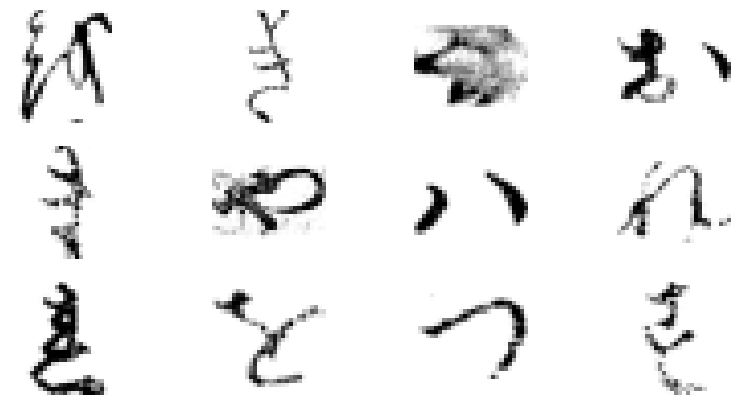

In [ ]:
idxs = np.argmin(X_digits_dist, axis=0) # Encontrar los índices de las imágenes más cercanas a los centroides
X_representative_digits = X_train.values[idxs] #

# Mostrar las imágenes más representativas
plt.figure(figsize=(10, 5))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(3, 4, index+1)
    plt.imshow(X_representative_digit.reshape(28, 28), cmap="binary")
    plt.axis('off')
plt.show()

Explicación:

-Índices de Imágenes Representativas: np.argmin(X_digits_dist, axis=0) encuentra las imágenes más cercanas a cada centroide del cluster.

-Visualización: Muestra las imágenes más representativas de cada cluster en una cuadrícula.

###Paso 5: Entrenamiento del Modelo de Clasificación
Ahora entrenamos un modelo de clasificación utilizando estas imágenes representativas y sus etiquetas:

In [ ]:
from sklearn.linear_model import LogisticRegression

# Etiquetas de las imágenes representativas
y_representative_digits = y_train.values[idxs]

# Asegurarse de que X_representative_digits sea un arreglo de NumPy
X_representative_digits = X_train_scaled.iloc[idxs].values

# Entrenar el modelo de clasificación
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)

# Evaluar el modelo asegurándose de que X_test_scaled sea un arreglo de NumPy
X_test_scaled_np = X_test_scaled.values
score = log_reg.score(X_test_scaled_np, y_test)
precision_percentage = score * 100
print(f'Precisión del modelo de clasificación con imágenes representativas: {precision_percentage:.2f}%')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Precisión del modelo de clasificación con imágenes representativas: 51.51%


X_representative_digits = X_train_scaled.iloc[idxs].values convierte el DataFrame a un arreglo de NumPy. X_test_scaled_np = X_test_scaled.values hace lo mismo para los datos de prueba.

###Paso 6: Entrenamiento del Modelo con Imágenes Aleatorias
- Imágenes Aleatorias: Entrena un modelo de regresión logística con 11 imágenes aleatorias del conjunto de entrenamiento y evalúa su precisión en el conjunto de prueba.

- Comparación: Esto permite comparar la eficacia de entrenar con imágenes representativas frente a imágenes aleatorias.

In [ ]:
# Entrenamiento del modelo con 11 imágenes aleatorias
log_reg_random = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg_random.fit(X_train_scaled[:11], y_train[:11])
score_random = log_reg_random.score(X_test_scaled, y_test)
precision_random_percentage = score_random * 100
print(f'Precisión del modelo de clasificación con imágenes aleatorias: {precision_random_percentage:.2f}%')

CPU times: user 46.3 ms, sys: 556 µs, total: 46.8 ms
Wall time: 47.3 ms
Precisión del modelo de clasificación con imágenes aleatorias: 24.22%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


#### Paso7: Asignación Automática de Etiquetas (Propagación de Etiquetas)



1. Concepto de Propagación de Etiquetas:

- Propagación: Asigna la etiqueta de la imagen representativa más cercana (el centroide del cluster) a todas las muestras que pertenecen al mismo cluster.
- Beneficio: Permite generar un conjunto de etiquetas extendido basado en un pequeño subconjunto de datos etiquetados, lo que es útil en contextos donde el etiquetado manual es costoso o laborioso.

- Iteración sobre los Clusters (k): Utiliza el valor optimal_k (obtenido del análisis de silueta) para iterar sobre los clusters y asignar etiquetas propagadas a todas las muestras en el conjunto de entrenamiento.

In [ ]:
# Inicializa un array vacío del mismo tamaño que el conjunto de datos de entrenamiento (X_train).

# Propósito: Este array almacenará las etiquetas propagadas, es decir,
# las etiquetas asignadas automáticamente a cada muestra de entrenamiento basada en los clusters formados por K-Means.
y_train_propagated = np.empty(len(X_train))


# Itera sobre cada cluster identificado por K-Means.
# kmeans.labels_ == i: Selecciona las muestras que pertenecen al cluster i
# Por ejemplo: Si i es 0, selecciona todas las muestras asignadas al primer cluster.

# y_representative_digits[i]: Obtiene la etiqueta de la imagen representativa del cluster i.
# Esta etiqueta fue asignada previamente a la imagen más representativa (el centroide) de cada cluster.
for i in range(k):
  y_train_propagated[kmeans.labels_== i] = y_representative_digits[i]

# y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]:
# Asigna la etiqueta de la imagen representativa del cluster i a todas las muestras que pertenecen a ese cluster.

#Propósito: Asegurarse de que todas las muestras dentro de un mismo cluster tengan la misma etiqueta, basada en la etiqueta de la imagen más representativa de ese cluster.

Después de ejecutar el bucle, y_train_propagated contendrá las etiquetas propagadas para todas las muestras del conjunto de entrenamiento. Cada muestra tendrá la etiqueta de la imagen representativa del cluster al que pertenece.

#### Paso 8: Entrenamiento del Modelo con Etiquetas Propagadas

En este paso, utilizamos las etiquetas propagadas para entrenar un modelo de regresión logística.

In [ ]:
# Proporción de datos a utilizar
proportion = 0.2  # 20%
num_samples = int(proportion * len(X_train))

# Entrenamiento de un modelo de regresión logística utilizando las etiquetas propagadas
log_reg_propagated = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)

# 20% de 45k = 8000
# Utiliza las primeras 4000 muestras del conjunto de datos de entrenamiento (X_train_scaled[:4000]) y
# sus etiquetas propagadas (y_train_propagated[:4000]).
log_reg_propagated.fit(X_train_scaled[:num_samples], y_train_propagated[:num_samples])

# Evaluamos el modelo en el conjunto de prueba (X_test_scaled y y_test) y muestra la precisión como un porcentaje.
score_propagated = log_reg_propagated.score(X_test_scaled, y_test)
precision_propagated_percentage = score_propagated * 100
print(f'Precisión del modelo de clasificación con etiquetas propagadas: {precision_propagated_percentage:.2f}%')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Precisión del modelo de clasificación con etiquetas propagadas: 65.67%


## 4. Aprendizaje Activo (Active Learning)

El aprendizaje activo es una técnica en la que el modelo de aprendizaje selecciona las muestras más informativas para ser etiquetadas manualmente. Este enfoque es útil cuando el etiquetado manual de datos es costoso y se desea maximizar la eficiencia del proceso de etiquetado.

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

def active_learning_iteration(X_train, y_train, y_train_propagated, X_test, y_test, k=10, iterations=10):
    log_reg_active = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

    for iteration in range(iterations):
        # Entrenar el modelo con las etiquetas propagadas actuales
        log_reg_active.fit(X_train, y_train_propagated)

        # Obtener las probabilidades de predicción para el conjunto de entrenamiento
        probas = log_reg_active.predict_proba(X_train)

        # Calcular las incertidumbres como 1 - la probabilidad más alta
        uncertainties = 1 - np.max(probas, axis=1)

        # Seleccionar las muestras con las predicciones más inciertas
        uncertain_indices = np.argsort(uncertainties)[-k:]

        # Obtener las etiquetas verdaderas de las muestras seleccionadas
        true_labels = y_train.iloc[uncertain_indices].values

        # Actualizar las etiquetas propagadas con las etiquetas verdaderas de las muestras seleccionadas
        y_train_propagated[uncertain_indices] = true_labels

        # Evaluar el modelo en el conjunto de prueba
        score = log_reg_active.score(X_test, y_test)
        precision_percentage = score * 100
        print(f"Iteración {iteration+1}/{iterations} - Precisión con aprendizaje activo: {precision_percentage:.2f}%")

    return log_reg_active

# Ejecutar aprendizaje activo en a
final_model = active_learning_iteration(X_train_scaled, y_train, y_train_propagated, X_test_scaled, y_test, k=10, iterations=10)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Iteración 1/10 - Precisión con aprendizaje activo: 66.39%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Iteración 2/10 - Precisión con aprendizaje activo: 66.39%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Iteración 3/10 - Precisión con aprendizaje activo: 66.37%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Iteración 4/10 - Precisión con aprendizaje activo: 66.41%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Iteración 5/10 - Precisión con aprendizaje activo: 66.42%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Iteración 6/10 - Precisión con aprendizaje activo: 66.41%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Iteración 7/10 - Precisión con aprendizaje activo: 66.41%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Iteración 8/10 - Precisión con aprendizaje activo: 66.49%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Iteración 9/10 - Precisión con aprendizaje activo: 66.49%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Iteración 10/10 - Precisión con aprendizaje activo: 66.49%


###Paso 1: Predicción de Probabilidades y Selección de Etiquetas con Baja Confianza

En este paso, el modelo predice las probabilidades de las etiquetas para cada muestra en el conjunto de entrenamiento. Luego, selecciona las muestras con las predicciones más inciertas, que se identifican por las menores probabilidades.

In [ ]:
# Obtener las probabilidades de predicción para el conjunto de entrenamiento
probas = final_model.predict_proba(X_train_scaled)

# Calcular las incertidumbres como 1 - la probabilidad más alta
uncertainties = 1 - np.max(probas, axis=1)

# Seleccionar los índices de las muestras con las predicciones más inciertas
uncertain_indices = np.argsort(uncertainties)[-k:]

- probas = log_reg_active.predict_proba(X_train): Obtiene las probabilidades de predicción para cada muestra.
- uncertainties = 1 - np.max(probas, axis=1): Calcula las incertidumbres de las predicciones.
- uncertain_indices = np.argsort(uncertainties)[-k:]: Selecciona los índices de las muestras con las mayores incertidumbres.

#### Paso 2: Visualización de Imágenes con Baja Confianza

Visualiza las imágenes correspondientes a las predicciones más inciertas. Esto ayuda a identificar visualmente las muestras que el modelo considera más difíciles de clasificar.

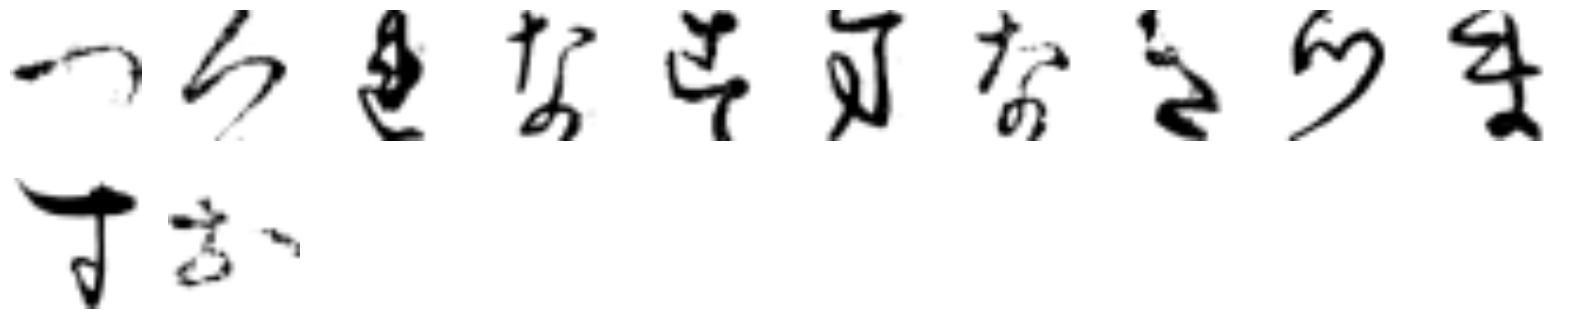

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar las muestras con las menores probabilidades (mayor incertidumbre)
X_lowest = X_train_scaled.values[uncertain_indices]

# Definir k correctamente (número de imágenes a mostrar)
k = len(X_lowest)

# Calcular el número de filas y columnas
ncols = 10
nrows = k // ncols + (1 if k % ncols != 0 else 0)

# Crear la figura
plt.figure(figsize=(ncols * 2, nrows * 2))

# Crear subplots para cada imagen en X_lowest
for index, img in enumerate(X_lowest):
    plt.subplot(nrows, ncols, index + 1)
    plt.imshow(img.reshape(28, 28), cmap="binary", interpolation="bilinear")
    plt.axis('off')

# Mostrar la figura
plt.show()

- X_lowest = X_train.values[uncertain_indices]: Selecciona las muestras con las menores probabilidades (mayor incertidumbre).
- plt.figure(figsize=(ncols * 2, nrows * 2)): Configura la visualización.
- plt.subplot(nrows, ncols, index + 1): Crea subplots para cada imagen en X_lowest.
- plt.imshow(img.reshape(28, 28), cmap="binary", interpolation="bilinear"): Muestra la imagen con baja confianza.

#### Paso 3: Obtener las Etiquetas Verdaderas y Actualizar las Etiquetas Propagadas

Actualiza las etiquetas propagadas con las etiquetas verdaderas de las muestras seleccionadas. Esto mejora la precisión del modelo en las siguientes iteraciones.

In [ ]:
# Obtener las etiquetas verdaderas de las muestras seleccionadas
true_labels = y_train.iloc[uncertain_indices].values

# Actualizar las etiquetas propagadas con las etiquetas verdaderas de las muestras seleccionadas
y_train_propagated[uncertain_indices] = true_labels

#### Paso 4: Evaluación del Modelo y Reentrenamiento

Evalúa el modelo en el conjunto de prueba y muestra la precisión. Luego, el modelo se reentrena con las etiquetas actualizadas para la siguiente iteración.

In [ ]:
log_reg_active = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg_active.fit(X_train_scaled, y_train_propagated)

# Evaluar el modelo en el conjunto de prueba
score = log_reg_active.score(X_test_scaled, y_test)
precision_percentage = score * 100
print(f"Precisión del modelo reentrenado con aprendizaje activo: {precision_percentage:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Precisión del modelo reentrenado con aprendizaje activo: 66.49%


## Otras técnicas de aprendizaje no supervisado

Otras técnicas muy usadas de aprendizaje no supervisado son

### DBSCAN

Este algoritmo define *clusters* como regiones continuas de alta densidad, agrupando progresivamente muestras cercanas entre ellas.

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [ ]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)
np.unique(dbscan2.labels_)

array([0, 1])

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

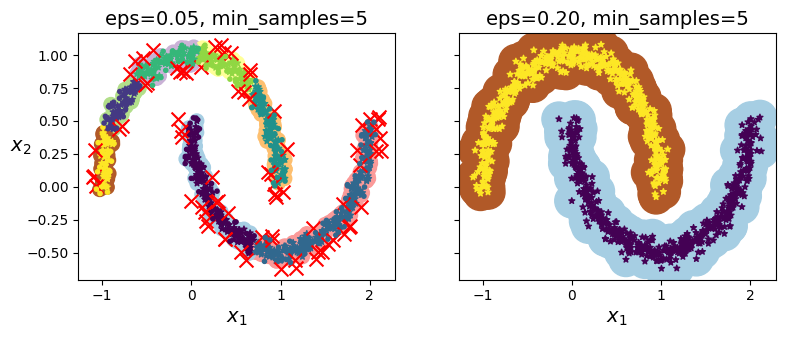

In [ ]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

Podemos considerar las muestras fuera de los grupos como anomalías, o bien usar un clasificador de vecinos cercanos para clasificar nuevas muestras.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [ ]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [ ]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

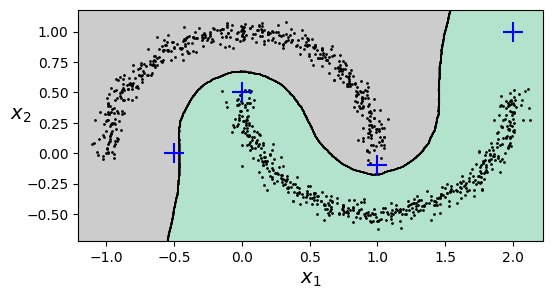

In [ ]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

### Gaussian Mixtures

Los modelos de *Gaussian Mixtures* son modelos probabilísticos que asumen que las muestras del conjunto de datos provienen de la mezcla de distribuciones Gaussianas cuyos parámetros son desconocidos.

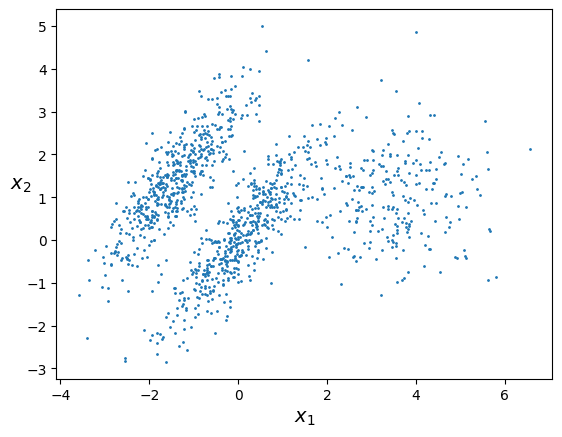

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]
plot_clusters(X)

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [ ]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

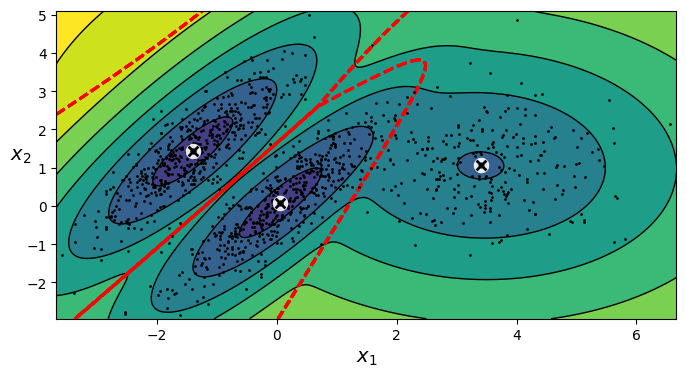

In [ ]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.show()

In [ ]:
gm.weights_

array([0.40005972, 0.20961444, 0.39032584])

In [ ]:
gm.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [ ]:
gm.covariances_

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

In [ ]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1])

In [ ]:
gm.predict_proba(X)

array([[6.76282339e-07, 2.31833274e-02, 9.76815996e-01],
       [6.74575575e-04, 1.64110061e-02, 9.82914418e-01],
       [9.99922764e-01, 1.99781831e-06, 7.52377580e-05],
       ...,
       [2.12540639e-26, 9.99999568e-01, 4.31902443e-07],
       [1.45002917e-41, 1.00000000e+00, 5.20915318e-16],
       [7.93266114e-41, 1.00000000e+00, 2.30971331e-15]])

Estos modelos son generativos, por lo que permiten crear nuevas muestras.

In [ ]:
X_new, y_new = gm.sample(6)
X_new

array([[-2.32491052,  1.04752548],
       [-1.16654983,  1.62795173],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [ 0.38079484, -0.56239369]])

In [ ]:
y_new

array([0, 0, 1, 1, 1, 2])

Definiendo un valor límite podemos detectar anomalías en los datos.

In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

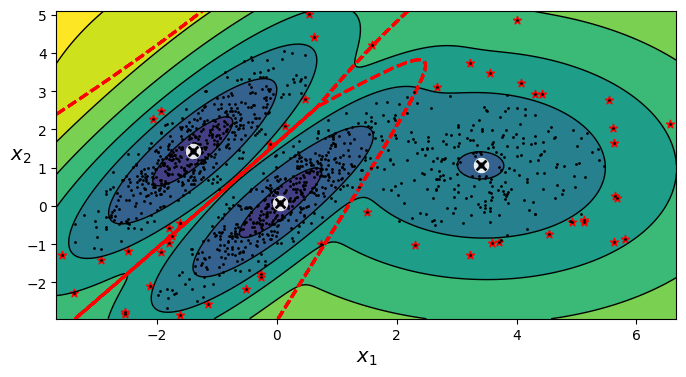

In [ ]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

Una alternativa muy usada para seleccionar el número de grupos óptimos es el uso de *Bayesian Gaussian Mixtures*, ya que pueden asignar pesos cercanos a 0 a grupos innecesarios.

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [ ]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

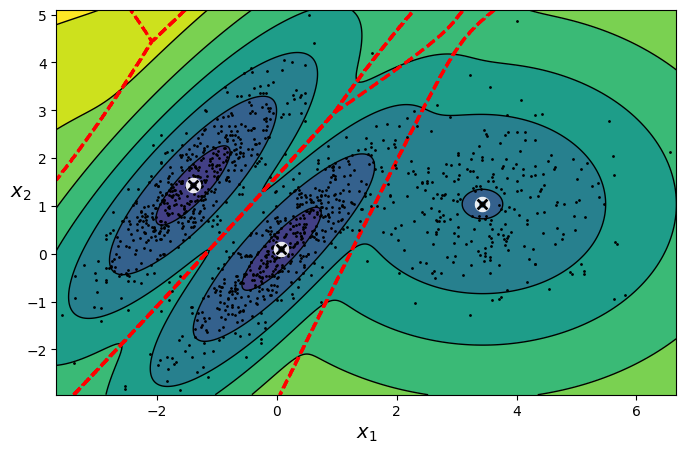

In [ ]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

## Resumen

En este post hemos introducido el concepto del aprendizaje no supervisado, modelos de *Machine Learning* que podemos usar cuando nuestros datos no están etiquetados. Hemos visto el algoritmo de *K-Means* y aplicado su uso en aprendizaje semi-supervisado y *active learning*. Por último, hemos introducido otros métodos útiles para detección de anomalías como *DBSCAN* o *Gaussian Mixtures*.